In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ds202/project

Mounted at /content/drive
/content/drive/MyDrive/ds202/project


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("data/prepared/train_full_cor.csv", nrows=1000)  # load first 1000 rows
train.head()




,SK_ID_CURR,app_CNT_CHILDREN,app_AMT_INCOME_TOTAL,app_AMT_CREDIT,app_AMT_ANNUITY,app_AMT_GOODS_PRICE,app_REGION_POPULATION_RELATIVE,app_DAYS_BIRTH,app_DAYS_EMPLOYED,app_DAYS_REGISTRATION,...,card_NAME_CONTRACT_STATUS_Completed_max_min_True,card_NAME_CONTRACT_STATUS_Completed_max_max_True,card_NAME_CONTRACT_STATUS_Refused_max_min_True,card_NAME_CONTRACT_STATUS_Refused_max_max_True,card_NAME_CONTRACT_STATUS_Demand_min_min_True,card_NAME_CONTRACT_STATUS_Demand_min_max_True,card_NAME_CONTRACT_STATUS_Sent proposal_max_min_True,card_NAME_CONTRACT_STATUS_Sent proposal_max_max_True,card_NAME_CONTRACT_STATUS_Signed_max_min_True,card_NAME_CONTRACT_STATUS_Signed_max_max_True
0,100002,0,12.218500,12.915581,10.114619,12.768544,0.018801,315.0,21.0,122.0,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,12.506181,14.072865,10.482892,13.937287,0.003541,559.0,40.0,40.0,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,11.119898,11.813037,8.817446,11.813037,0.010032,635.0,8.0,142.0,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,11.813037,12.652947,10.298481,12.601491,0.008019,634.0,101.0,328.0,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,11.707678,13.148033,9.992711,13.148033,0.028663,664.0,101.0,144.0,...,False,False,False,False,False,False,False,False,False,False


In [8]:


# Load application_train.csv for TARGET
target_df = pd.read_csv("input/application_train.csv", usecols=["SK_ID_CURR", "TARGET"])

# Load partial merged data (exclude TARGET)
train = pd.read_csv("data/prepared/train_full_cor.csv", usecols=[
    "SK_ID_CURR", "app_DAYS_BIRTH", "app_AMT_INCOME_TOTAL"
], nrows=100000)

# Merge in TARGET
train = pd.merge(train, target_df, on="SK_ID_CURR", how="left")

# Convert to age
train["AGE"] = (-train["app_DAYS_BIRTH"] / 365).astype(int)
train.rename(columns={"app_AMT_INCOME_TOTAL": "INCOME", "TARGET": "LABEL"}, inplace=True)



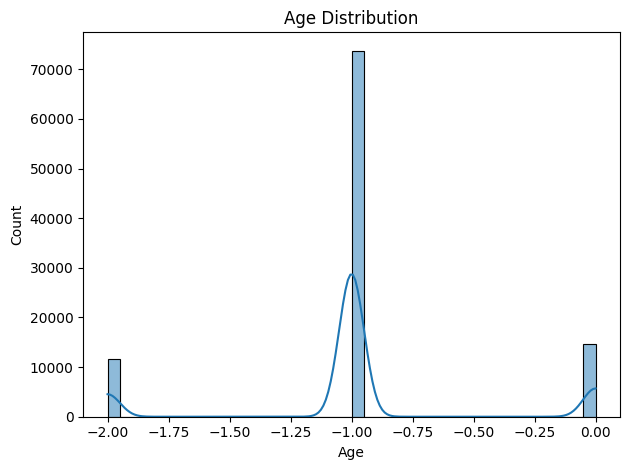

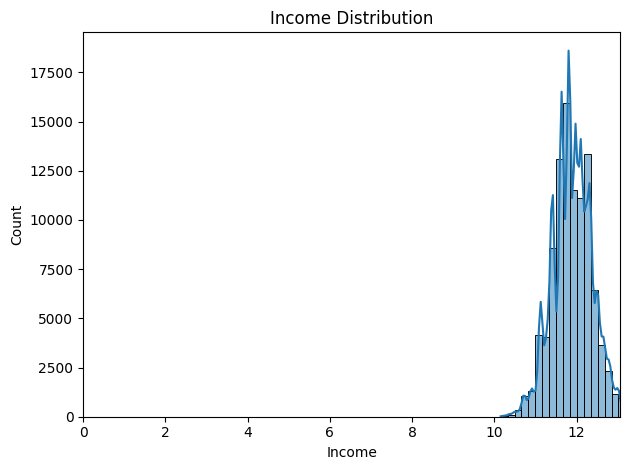

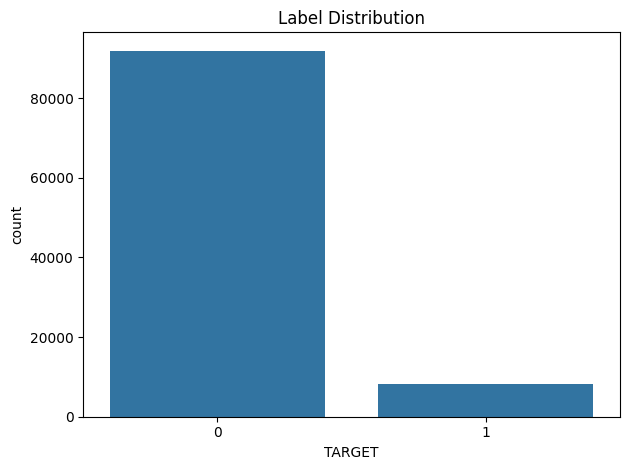

In [9]:
# AGE distribution
sns.histplot(train["AGE"], bins=40, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# INCOME distribution (trimmed for outliers)
sns.histplot(train["INCOME"], bins=50, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.xlim(0, train["INCOME"].quantile(0.99))
plt.tight_layout()
plt.show()

# LABEL distribution (0 = good, 1 = default)
sns.countplot(x="LABEL", data=train)
plt.title("Label Distribution")
plt.xlabel("TARGET")
plt.tight_layout()
plt.show()


In [10]:
print("Correlation between AGE, INCOME, and LABEL:")
print(train[["AGE", "INCOME", "LABEL"]].corr())


Correlation between AGE, INCOME, and LABEL:
             AGE    INCOME     LABEL
AGE     1.000000  0.073859  0.062354
INCOME  0.073859  1.000000 -0.020355
LABEL   0.062354 -0.020355  1.000000


In [11]:
# AGE groups
age_bins = pd.cut(train["AGE"], bins=[20,30,40,50,60,70], right=False)
print("\nAge Group Frequencies:")
print(age_bins.value_counts().sort_index())

# INCOME bands (quintiles)
income_bins = pd.qcut(train["INCOME"], q=5, duplicates="drop")
print("\nIncome Band Frequencies:")
print(income_bins.value_counts().sort_index())



Age Group Frequencies:
AGE
[20, 30)    0
[30, 40)    0
[40, 50)    0
[50, 60)    0
[60, 70)    0
Name: count, dtype: int64

Income Band Frequencies:
INCOME
(10.151, 11.503]    20750
(11.503, 11.813]    27908
(11.813, 11.995]    11544
(11.995, 12.324]    24470
(12.324, 18.578]    15328
Name: count, dtype: int64


In [12]:
print("\nSubset shape:", train.shape)
print("Columns used:", train.columns.tolist())



Subset shape: (100000, 5)
Columns used: ['SK_ID_CURR', 'INCOME', 'app_DAYS_BIRTH', 'LABEL', 'AGE']
